## Binary Classifcation

by: Afonso Proenca

In [19]:
import torch as torch
import math as math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In machine learning, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. 

A classification model tries to draw some conclusion from the input values given for training. It will predict the class labels/categories for the new data. 

Here we can visualize a simple classification problem where we classify if the x1 value of a given point is positive or negative:

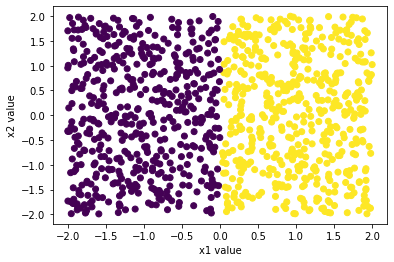

In [20]:
X = torch.rand(1000,2).type(torch.FloatTensor)*4-2
Y = torch.empty(1000).type(torch.LongTensor)

for i in range(len(X)):
    if(X[i][0]>=0):
        Y[i] = 1
    else:
        Y[i] = 0
        
plt.xlabel('x1 value')
plt.ylabel('x2 value')
plt.scatter(X[:, 0], X[:, 1],c=Y)

We can see here that, for any given point: 

<lu>
    <li>if x1 is less than 0: Point classified as negative </li>
    <li>if x1 is equal or greater than 0: Point classified as positive.</li>
</lu>

When we don't want to or can't find a function that divides these points into 2 classes we can use machine learning to find that function for us by giving it examples of already known points and their respective classes.

One way to do this is through a Neural Network.

A single-layer perceptron takes data as input and its weights are summed up then an activation function is applied before sent to the output layer.

The activation functions in the neural network introduce the non-linearity to the linear output. It defines the output of a layer, given data, meaning it sets the threshold for making the decision of whether to pass the information or not. 

You can choose different activation functions depending on the task you would like to achieve.

In the single layer perceptron example below, the fully-connected layer self.fc outputs linear information and self.relu makes it non-linear.

x is passed to a fully-connected layer self.fc(x), then a step function self.relu(x) is applied and is returned as an output.

In [21]:
class Perceptron(torch.nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(1,1)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        output = self.fc(x)
        output = self.relu(x)
        return output

Feedforward Neural Network models have hidden layers in between the input and the output layers. 

After every hidden layer, an activation function is applied to introduce non-linearity. 

When you have more than two hidden layers, the model is also called the deep/multilayer feedforward model or multilayer perceptron model(MLP).

In the example belpw there is only one hidden layer but you can add as many hidden layers as you want. 

In [22]:
class Feedforward(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(Feedforward, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
        def forward(self, x):
            hidden = self.fc1(x)
            relu = self.relu(hidden)
            output = self.fc2(relu)
            output = self.sigmoid(output)
            return output

In the example above, ReLU is used as activation before the information is sent to the output layer. This is to introduce non-linearity to the linear output from the hidden layer as mentioned earlier.

What ReLU does here is that if the function is applied to a set of numerical values, any negative value will be converted to 0 otherwise the values stay the same.

Sigmoid is used for the output activation function. This is because our example is a binary classification task. Sigmoid is the right function to use because it calculates the probability(ranging between 0 and 1) of the target output being label 1.

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.25, random_state=73)

Y_train = Y_train.type(torch.FloatTensor)
Y_test = Y_test.type(torch.FloatTensor)

In [24]:
model = Feedforward(2, 10)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [25]:
model.eval()
y_pred = model(X_test)
before_train = criterion(y_pred.squeeze(), Y_test)
print('Loss before training:' , before_train.item())

Loss before training: 0.7528982162475586


In [26]:
model.train()
epoch = 1000
for epoch in range(epoch):
    # Zero gradient
    optimizer.zero_grad()
    
    # Forward pass
    y_pred = model(X_train)
    
    # Compute Loss
    loss = criterion(y_pred.squeeze(), Y_train)
    if epoch % 100 == 0:
        print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    
    # Backward pass
    loss.backward()
    
    optimizer.step()

Epoch 0: train loss: 0.7446112632751465
Epoch 100: train loss: 0.6200636625289917
Epoch 200: train loss: 0.5219632387161255
Epoch 300: train loss: 0.4346625506877899
Epoch 400: train loss: 0.3602350950241089
Epoch 500: train loss: 0.3012726902961731
Epoch 600: train loss: 0.25629672408103943
Epoch 700: train loss: 0.22207307815551758
Epoch 800: train loss: 0.1954958736896515
Epoch 900: train loss: 0.17442907392978668


Loss after training: 0.15926751494407654
Accuracy after training: 0.98


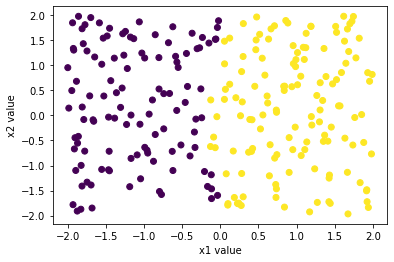

In [27]:
model.eval()
y_pred = model(X_test)
loss = criterion(y_pred.squeeze(), Y_test)  
y_pred = y_pred.round().detach().numpy()
accuracy = accuracy_score(y_pred,Y_test)
print('Loss after training:' , loss.item())
print('Accuracy after training:', accuracy)

plt.xlabel('x1 value')
plt.ylabel('x2 value')
plt.scatter(X_test[:, 0], X_test[:, 1],c=y_pred)